In [1]:
import pandas as pd

In [2]:
import klib

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("example20.csv")

In [5]:
df.head()

,customer_id,first_name,last_name,rental_date,SUM(payment.amount)
0,526,KARL,SEAL,2005-05-28 00:40:48,9969.75
1,148,ELEANOR,HUNT,2005-05-28 23:53:18,9960.84
2,144,CLARA,SHAW,2005-05-27 00:49:27,8214.36
3,137,RHONDA,KENNEDY,2005-05-30 12:13:52,7589.79
4,178,MARION,SNYDER,2005-06-15 09:03:52,7589.79


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          599 non-null    int64  
 1   first_name           599 non-null    object 
 2   last_name            599 non-null    object 
 3   rental_date          599 non-null    object 
 4   SUM(payment.amount)  599 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.5+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [9]:
df_cleaned = klib.data_cleaning(df)

Shape of cleaned data: (599, 5)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-0.0%)



In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         599 non-null    int16  
 1   first_name          599 non-null    string 
 2   last_name           599 non-null    string 
 3   rental_date         599 non-null    string 
 4   sum_payment_amount  599 non-null    Float32
dtypes: Float32(1), int16(1), string(3)
memory usage: 18.3 KB


In [11]:
df_cleaned.rename(columns = {'sum_payment_amount':'total_expended'}, inplace = True)

In [12]:
df_cleaned.head()

,customer_id,first_name,last_name,rental_date,total_expended
0,526,KARL,SEAL,2005-05-28 00:40:48,9969.75
1,148,ELEANOR,HUNT,2005-05-28 23:53:18,9960.839844
2,144,CLARA,SHAW,2005-05-27 00:49:27,8214.360352
3,137,RHONDA,KENNEDY,2005-05-30 12:13:52,7589.790039
4,178,MARION,SNYDER,2005-06-15 09:03:52,7589.790039


In [13]:
df_cleaned["customer_id"].duplicated().sum()

0

In [14]:
df_cleaned["first_name"].duplicated().sum()

8

In [15]:
df_cleaned["customer_id"] = df_cleaned["customer_id"].astype('string')

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     599 non-null    string 
 1   first_name      599 non-null    string 
 2   last_name       599 non-null    string 
 3   rental_date     599 non-null    string 
 4   total_expended  599 non-null    Float32
dtypes: Float32(1), string(4)
memory usage: 21.8 KB


In [17]:
df_cleaned["ranking_by_expenditure"]= df_cleaned["total_expended"].rank(ascending=False)

In [18]:
df_cleaned.head(15)

,customer_id,first_name,last_name,rental_date,total_expended,ranking_by_expenditure
0,526,KARL,SEAL,2005-05-28 00:40:48,9969.75,1.0
1,148,ELEANOR,HUNT,2005-05-28 23:53:18,9960.839844,2.0
2,144,CLARA,SHAW,2005-05-27 00:49:27,8214.360352,3.0
3,137,RHONDA,KENNEDY,2005-05-30 12:13:52,7589.790039,4.5
4,178,MARION,SNYDER,2005-06-15 09:03:52,7589.790039,4.5
5,236,MARCIA,DEAN,2005-05-26 15:46:56,7374.359863,6.0
6,469,WESLEY,BULL,2005-05-26 03:07:43,7104.0,7.0
7,459,TOMMY,COLLAZO,2005-05-24 22:54:33,7091.560059,8.0
8,468,TIM,CARY,2005-05-25 17:17:04,6848.790039,9.0
9,176,JUNE,CARROLL,2005-05-26 03:17:42,6424.310059,10.0


In [19]:
df_cleaned.sort_values("ranking_by_expenditure", ascending=True).head(12)

,customer_id,first_name,last_name,rental_date,total_expended,ranking_by_expenditure
0,526,KARL,SEAL,2005-05-28 00:40:48,9969.75,1.0
1,148,ELEANOR,HUNT,2005-05-28 23:53:18,9960.839844,2.0
2,144,CLARA,SHAW,2005-05-27 00:49:27,8214.360352,3.0
3,137,RHONDA,KENNEDY,2005-05-30 12:13:52,7589.790039,4.5
4,178,MARION,SNYDER,2005-06-15 09:03:52,7589.790039,4.5
5,236,MARCIA,DEAN,2005-05-26 15:46:56,7374.359863,6.0
6,469,WESLEY,BULL,2005-05-26 03:07:43,7104.0,7.0
7,459,TOMMY,COLLAZO,2005-05-24 22:54:33,7091.560059,8.0
8,468,TIM,CARY,2005-05-25 17:17:04,6848.790039,9.0
9,176,JUNE,CARROLL,2005-05-26 03:17:42,6424.310059,10.0


In [20]:
df_ranking_sorted = df_cleaned.sort_values("ranking_by_expenditure", ascending=True)

In [21]:
df_ranking_sorted.head() 

,customer_id,first_name,last_name,rental_date,total_expended,ranking_by_expenditure
0,526,KARL,SEAL,2005-05-28 00:40:48,9969.75,1.0
1,148,ELEANOR,HUNT,2005-05-28 23:53:18,9960.839844,2.0
2,144,CLARA,SHAW,2005-05-27 00:49:27,8214.360352,3.0
3,137,RHONDA,KENNEDY,2005-05-30 12:13:52,7589.790039,4.5
4,178,MARION,SNYDER,2005-06-15 09:03:52,7589.790039,4.5


In [22]:
df_top_ten_customers_by_expenditure = df_ranking_sorted.query("ranking_by_expenditure<=10") 

In [23]:
df_top_ten_customers_by_expenditure.head(11)

,customer_id,first_name,last_name,rental_date,total_expended,ranking_by_expenditure
0,526,KARL,SEAL,2005-05-28 00:40:48,9969.75,1.0
1,148,ELEANOR,HUNT,2005-05-28 23:53:18,9960.839844,2.0
2,144,CLARA,SHAW,2005-05-27 00:49:27,8214.360352,3.0
3,137,RHONDA,KENNEDY,2005-05-30 12:13:52,7589.790039,4.5
4,178,MARION,SNYDER,2005-06-15 09:03:52,7589.790039,4.5
5,236,MARCIA,DEAN,2005-05-26 15:46:56,7374.359863,6.0
6,469,WESLEY,BULL,2005-05-26 03:07:43,7104.0,7.0
7,459,TOMMY,COLLAZO,2005-05-24 22:54:33,7091.560059,8.0
8,468,TIM,CARY,2005-05-25 17:17:04,6848.790039,9.0
9,176,JUNE,CARROLL,2005-05-26 03:17:42,6424.310059,10.0


In [24]:
x = df_top_ten_customers_by_expenditure["total_expended"]/1000

In [25]:
y = df_top_ten_customers_by_expenditure["first_name"]

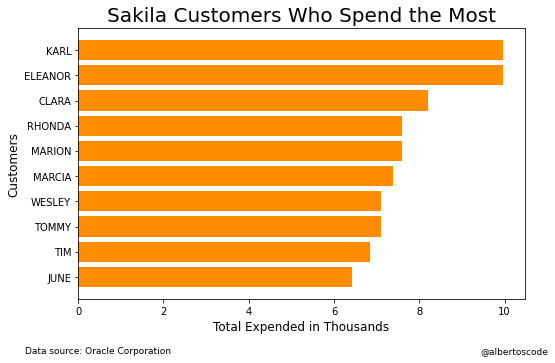

In [26]:
figure, ax2 = plt.subplots(figsize=(8, 5))

ax2.barh(y, x, color = "darkorange")

ax2.invert_yaxis()

ax2.set_xlabel("Total Expended in Thousands", fontsize=12)

ax2.set_ylabel("Customers", fontsize=12)

ax2.set_title("Sakila Customers Who Spend the Most", fontsize=20)

plt.annotate('Data source: Oracle Corporation',
            xy = (-0.12, -0.20),
            xycoords='axes fraction',
            fontsize=9)

plt.annotate('@albertoscode',
            xy = (.90, -0.20),
            xycoords='axes fraction',
            fontsize=9)

plt.savefig("sakilaCustomers.jpg", dpi=150,bbox_inches='tight')

plt.show()